In [46]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs', split='train')
df = dataset.to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

subplots(nrows, ncols): Create multiple plots within a single figure
fig, ax = plt.subplots(1,2) - Creates a figure with 1 row and 2 columns of subplots.
fig - represents the entire figure window that will contain all the subplots.
ax - either a single axis object (for a single subplot) or an array of axis objects (for multiple subplots).

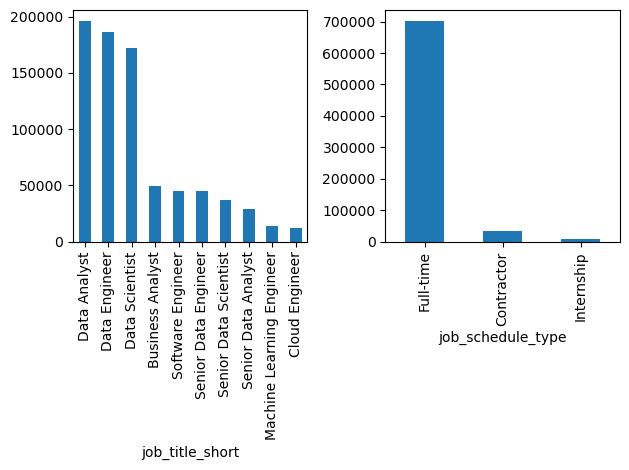

In [47]:
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])
plt.tight_layout() # Prevent overlapping of axes, labels, titles, ticks lables, ...
plt.show()

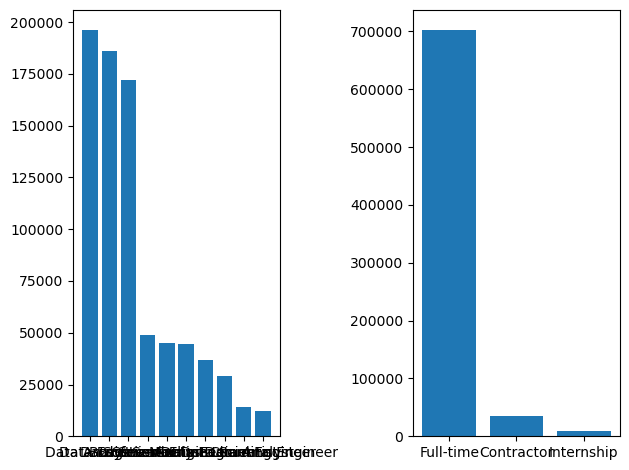

In [48]:
# This code block behaves like the one above but using matplotlib instead
fig, ax = plt.subplots(1, 2) 

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))

fig.tight_layout()

plt.show()

In [49]:
df_skills = df.explode('job_skills')
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index(name='skill_count').sort_values('skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [50]:
job_titles = df_skills_count['job_title_short'].unique().tolist()[:3]
job_titles

['Data Scientist', 'Data Engineer', 'Data Analyst']

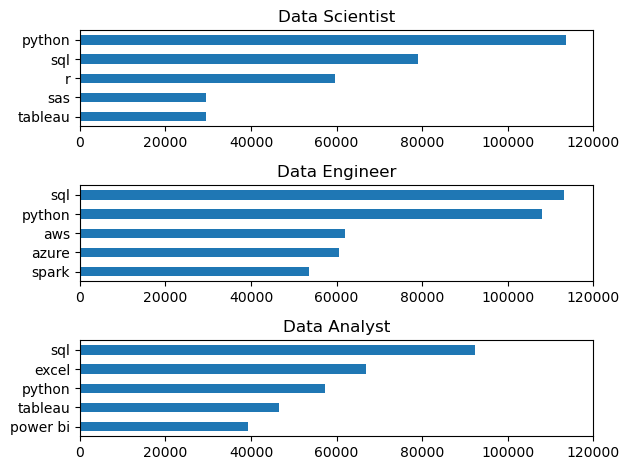

In [51]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short'] == job_title].head(5).plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title, legend=False)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlim(0, 120000)

plt.tight_layout()
plt.savefig('13_top_skills.png') # save figure
plt.show()